In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')


In [19]:
# Load the dataset
file_path = 'crop.csv'
crop_data = pd.read_csv(file_path)

# Print initial data information
print(crop_data.head())
print(crop_data.info())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


C:\Users\anike\AppData\Local\Temp\ipykernel_8412\4293104689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crop_data, x='label', palette='viridis')


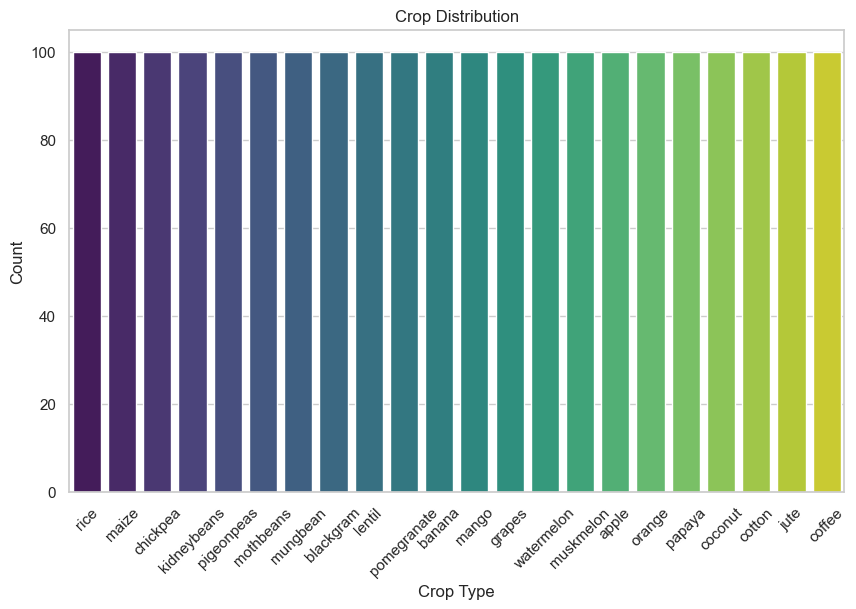

In [20]:
# Visualizing the distribution of crops
plt.figure(figsize=(10, 6))
sns.countplot(data=crop_data, x='label', palette='viridis')
plt.title('Crop Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Checking for missing values
missing_values = crop_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


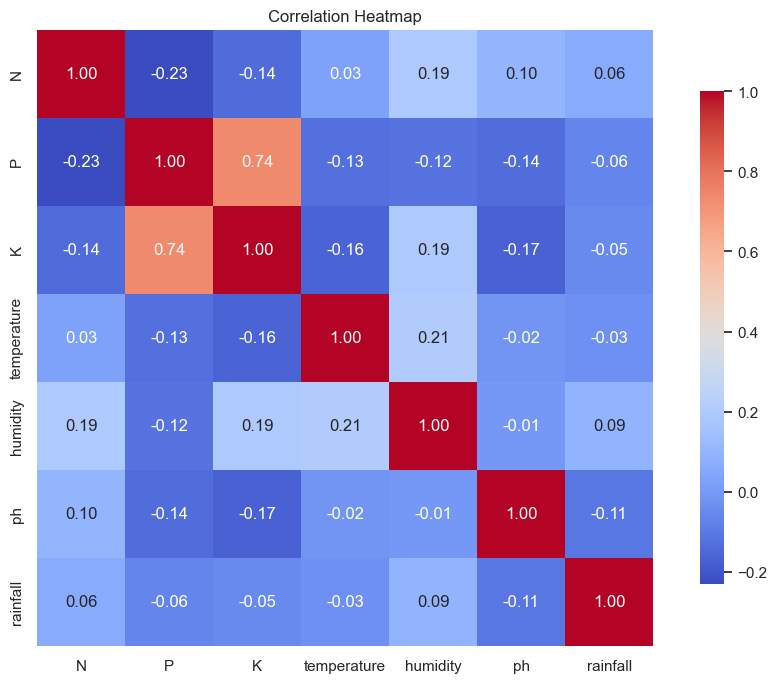

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Calculate the correlation matrix only for numeric columns
correlation_matrix = crop_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# Separate features and target variable
X = crop_data.drop('label', axis=1)
y = crop_data['label']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the LabelEncoder for later use
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [24]:
# Define the models (Logistic Regression removed)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Hyperparameter grids for fine-tuning using Grid Search
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy after Grid Search: 99.32%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
  

<Figure size 1200x800 with 0 Axes>

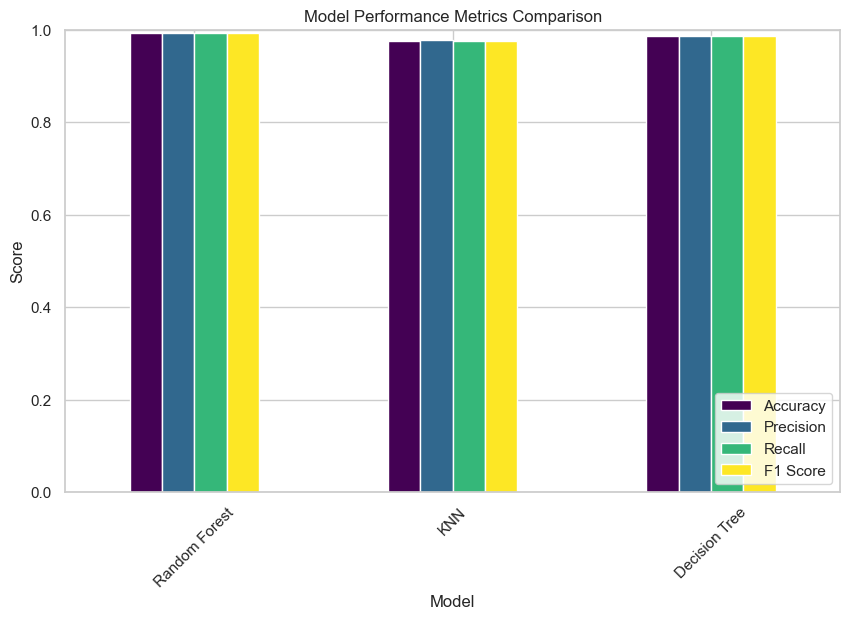

In [25]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionary to store metrics for each model
metrics_results = {}

# Perform Grid Search and evaluate each model on multiple metrics
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model after Grid Search
    best_model = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics in the dictionary
    metrics_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Print accuracy and best parameters
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"{model_name} Accuracy after Grid Search: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

# Convert the metrics dictionary to a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics_results).T  # Transpose for better readability
print("\nModel Performance Metrics:\n", metrics_df)

# Plotting the model metrics comparison
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limits for better visualization
plt.show()


C:\Users\anike\AppData\Local\Temp\ipykernel_8412\499506849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


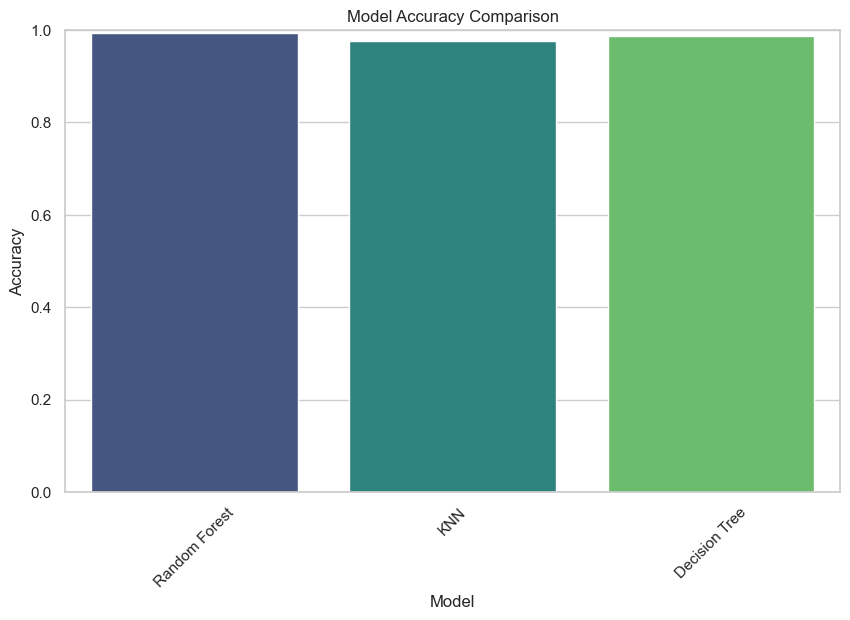

In [26]:
# Displaying the comparison of the models' accuracy
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limits for better visualization
plt.show()


C:\Users\anike\AppData\Local\Temp\ipykernel_8412\2137555878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


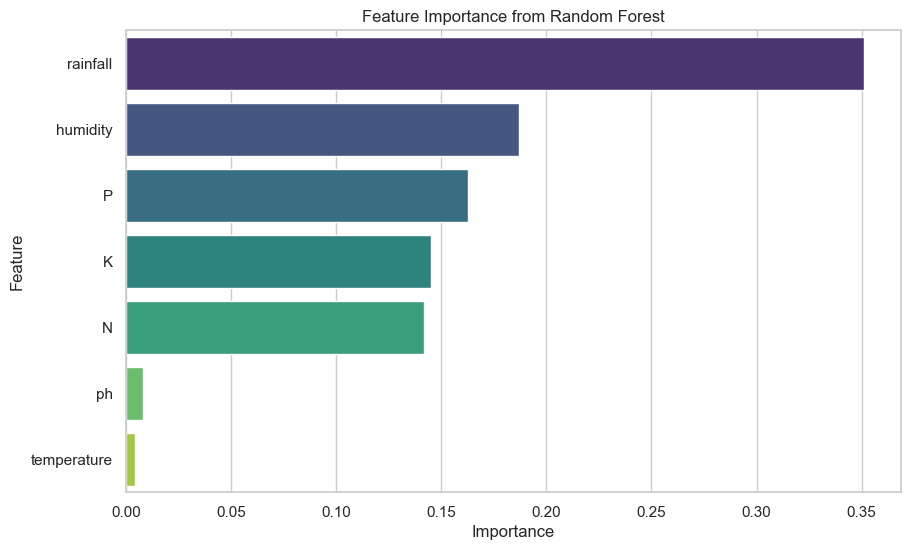

In [27]:
# Check if the best model is Random Forest to show feature importance
best_model_name = max(results, key=results.get)

if best_model_name == 'Random Forest':
    # Random Forest model: Feature importance
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plotting the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print(f"The best model is {best_model_name}, which does not provide feature importance.")


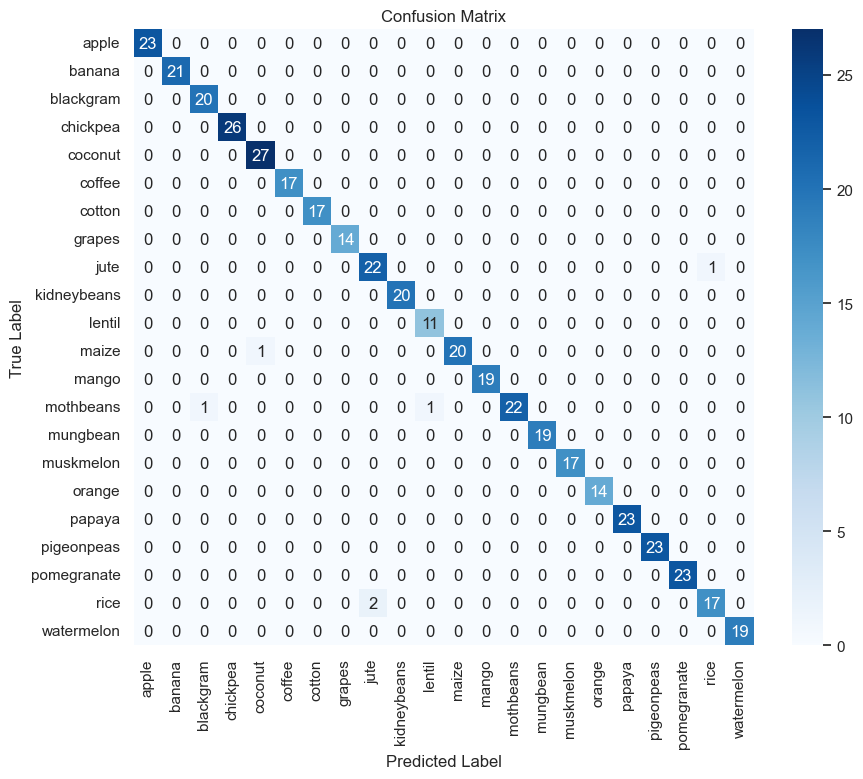

In [28]:
# Confusion Matrix for the best model
y_pred_best_model = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best_model)

# Create a DataFrame for the confusion matrix
classes = label_encoder.classes_
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
# Saving the best model and the scaler
joblib.dump(best_model, 'best_crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [30]:
# Load the saved model and label encoder for predictions
model = joblib.load('best_crop_recommendation_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# New input data
input_data = {
    'N': 200,
    'P': 520,
    'K': 13,
    'temperature': 80,
    'humidity': 92,
    'ph': 3.2,
    'rainfall': 102
}

# Convert the input data into a DataFrame
input_df = pd.DataFrame([input_data])

# Scale the input data
input_scaled = scaler.transform(input_df)

# Make predictions using the best trained model
predicted_label_encoded = model.predict(input_scaled)

# Decode the predicted label back to its original form
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

# Display the predicted crop type
print(f"Predicted Crop Type for the given soil conditions: {predicted_label[0]}")


Predicted Crop Type for the given soil conditions: orange
